<!--
SPDX-FileCopyrightText: Copyright (c) 2019-2025 Idiap Research Institute <contact@idiap.ch>
SPDX-FileContributor: Alina Elena Baia <alina.baia.idiap.ch>
SPDX-FileContributor: Darya Baranouskaya <darya.baranouskaya.idiap.ch>
SPDX-FileContributor: Olena Hrynenko <olena.hrynenko.idiap.ch>
-->

# Practice exercises after Lecture 1
This notebook contains the practice exercises with instructions and explanations.

Work through the cells below in sequential order, executing each cell as you progress. Throughout the notebook, you will encounter instructions marked with the words "TO DO". Follow the instructions and write code to complete the tasks. Replace all  'raise NotImplementedError()' with your code. Along the way, you will also find questions. Try to reflect on the questions before/after running the code.


This notebook was developed at the [Idiap Research Institute](https://www.idiap.ch) by [Alina Elena Baia](mailto:alina.baia.idiap.ch>), [Darya Baranouskaya](mailto:darya.baranouskaya.idiap.ch) and [Olena Hrynenko](mailto:olena.hrynenko.idiap.ch) (equal contribution). Some parts of the notebook were adopted from [this](https://github.com/DorsaRoh/Machine-Learning) tutorial.

Any reproduction or distribution of this document, in whole or in part, is prohibited unless permission is granted by the authors.

Welcome to the first lab session of EE559.
This notebook will take you step-by-step through the structure of your first Neural Network.

**What is a Neuron?** A neuron is a "unit that holds a number".

**What is the Neural Network?** It is a family of functions $f(\boldsymbol{x})$ that take the input and provide an output. It consists of individual layers, layers consist of the neurons.

**Why family of functions?** The model parameters $\Theta$, or the weights, define a particular instance in the family of functions. Models with different weights, $\Theta_i, \ \Theta_j$, result in two different instances: $f(\boldsymbol{x}, \Theta_i)$ and $f(\boldsymbol{x}, \Theta_j)$.

We are going to explore the basics of the neural-network contruction on the example of tabular data.  The data contains information about students passing of failing the exam, as well as the information about Study Hours spend on preparation, and Previous Exam Score. Column of the data Pass/Fail contains information on whether the student has passed (1) or failed (0) the exam.

With the neural network we are going to predict if the sudent is going to Pass (class 1) or Fail (class 0). The neural networks were pretrained on the train set of the data and now we are going to test the predictions on a test set of 20 rows.

##### 1.1 Read tabular data for a binary classification task.

In [1]:
import pandas as pd
import torch
import numpy as np
from torch import nn
import os

## NOTE: make sure to upload the csv file into the colab session
# read and prepare the data
# we read the tabular data with pandas library and save it in a Dataframe

data = pd.read_csv('student_exam_data.csv')
#printing the first 20 rows of the dataframe
data.head(20)

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0
5,2.403951,49.757016,0
6,1.522753,94.655631,0
7,8.795585,89.352235,1
8,6.410035,96.987995,1
9,7.372653,83.543171,1


In [2]:
#reading the first 20 samples from the dataframe
x = torch.Tensor(data.iloc[:20, :2].to_numpy())

# Data normalisation, mean and std are taken from the training set
x_mean = torch.Tensor([5.487, 68.917])
x_std = torch.Tensor([2.688, 17.129])
x = (x - x_mean) /  x_std
y = torch.Tensor(data.iloc[:20, 2].to_numpy())

# printing the shape of the data
print(x.shape, y.shape)
print(x, y)

torch.Size([20, 2]) torch.Size([20])
tensor([[-0.4152,  0.7574],
        [ 1.5139,  0.1897],
        [ 0.7816, -0.6040],
        [ 0.3352,  1.1624],
        [-1.1469,  0.7103],
        [-1.1470, -1.1186],
        [-1.4748,  1.5026],
        [ 1.2309,  1.1930],
        [ 0.3434,  1.6388],
        [ 0.7015,  0.8539],
        [-1.6003,  0.4605],
        [ 1.5782, -0.2232],
        [ 1.1179,  1.5790],
        [-0.9583,  1.3455],
        [-1.0605, -1.5298],
        [-1.0552, -1.5958],
        [-0.6506, -0.3695],
        [ 0.0877,  1.1510],
        [-0.2230,  1.7701],
        [-0.6942, -1.1613]]) tensor([0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
        0., 0.])


**TODO:** print the dimensionality of the input feature vector, and the batch size (e.g., the numner of the data samples we use).

In [3]:
## TODO: Your code here
x_i_dim = ...
n_samples = ...
raise NotImplementedError()
print(f"The dimensionality of the input is: {x_i_dim}")
print(f"The number of samples in the table is: {n_samples}")

The dimensionality of the input is: 2
The number of samples in the table is: 20


##### 1.2 Build the model with nn.Linear(). Understand what a layer, linear connections, weights, biases, and logits are.


Now let's build our first neural network which consists of the input layer, and the output layer, and has no hidden layers. A hidden layer is called "hidden" because neither their inputs, not outputs are directly observable. These layers are located between the input and output layers.

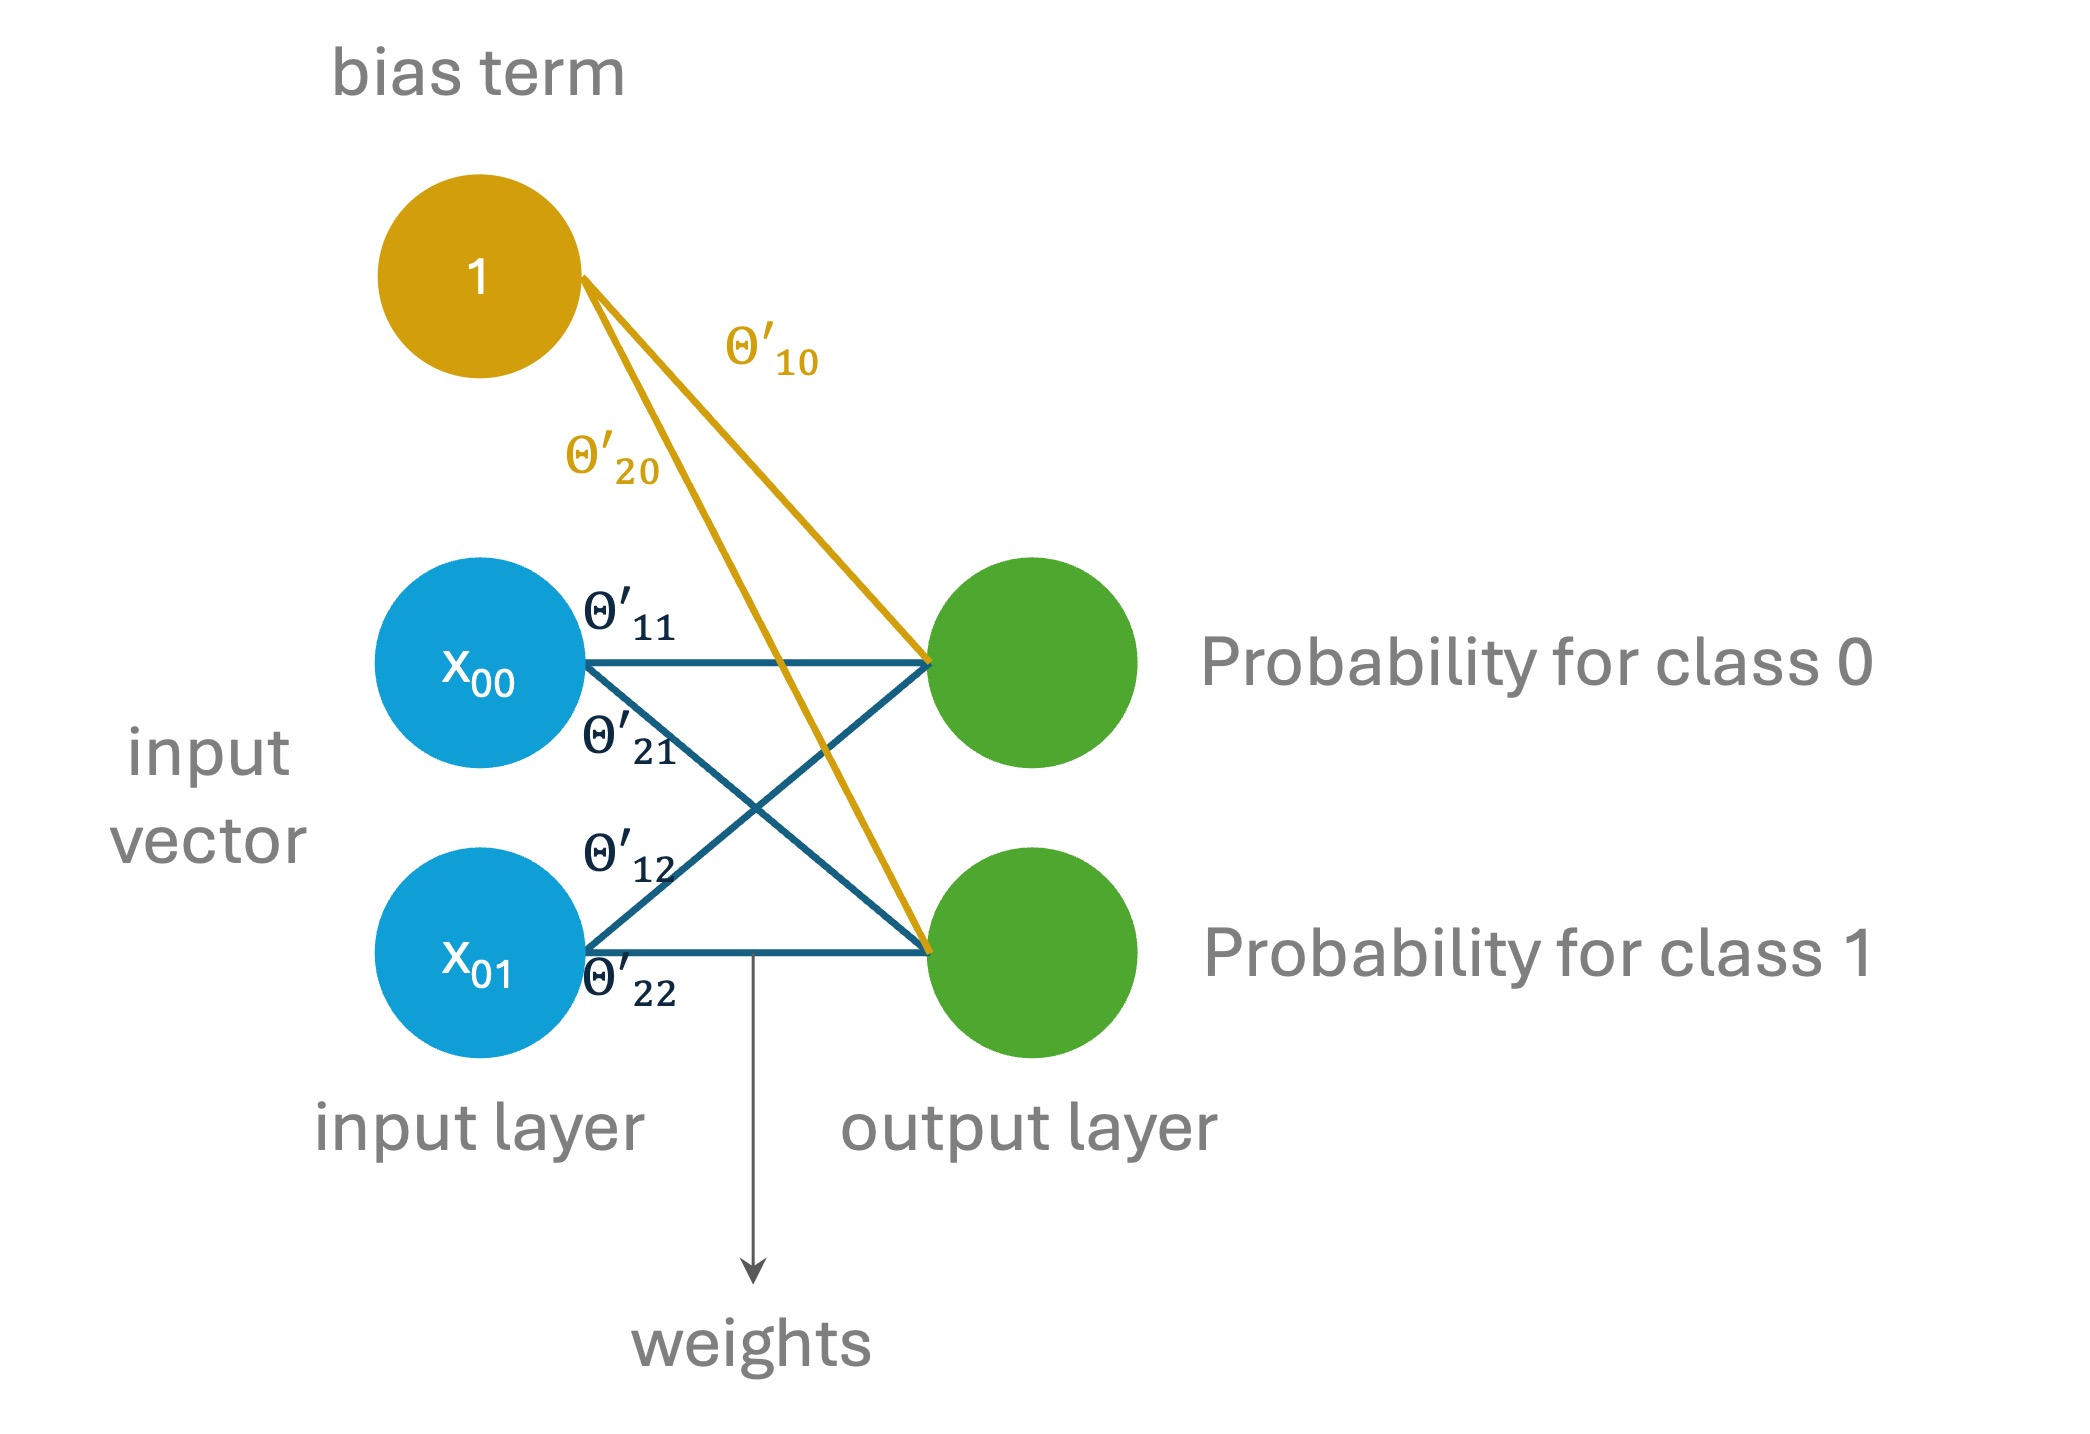

**Important note:** Sometimes people use term 'layer' for the as the collection of neurons, sometimes, as the linear connections, which causes ambiguity in notation. More details can be found [here](https://www.baeldung.com/cs/hidden-layers-neural-network). In this exercise a layer is a collection of neurons, which means that we have one input layer, one output layer, and no hidden layers. In our code,  `nn.Linear` introduces the connections between the input and output layers.

In [4]:
#one set on linear connections is already a model

number_of_input_channels = 2 # 'Study Hours' and 'Previous Exam Score', corresponds to x_i_dim
number_of_classes = 2 # 'Pass' and 'Fail'

#initialise the element of class Linear
linear_model = nn.Linear(in_features=number_of_input_channels, out_features=number_of_classes)

#load pretrained weights
linear_model.load_state_dict(torch.load('lab1_layer_weights.pth'))

<ipython-input-4-0981dd81ddee>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  linear_model.load_state_dict(torch.load('lab1_layer_weights.pth'))


<All keys matched successfully>

**How is the signal in the network propagated forward?** With a piece-wise linear weighted sums. These sums are defined by the weights $\boldsymbol{\Theta}$ and their biases $\boldsymbol{\Theta}_0$.

$$
\boldsymbol{\Theta} =
\begin{bmatrix}
\Theta_{11}' & \Theta_{12}' \\
\Theta_{21}' & \Theta_{22}'
\end{bmatrix},
\quad
\boldsymbol{\Theta}_0 =
\begin{bmatrix}
\Theta_{10}' \\
\Theta_{20}'
\end{bmatrix}
$$

"Each neuron in the one layer is connected to all neurons in the next layer. These connections are defined by their strength, which is stored in the matricies (e.g., $\boldsymbol{\Theta}$)." [(cit.)](https://github.com/DorsaRoh/Machine-Learning)

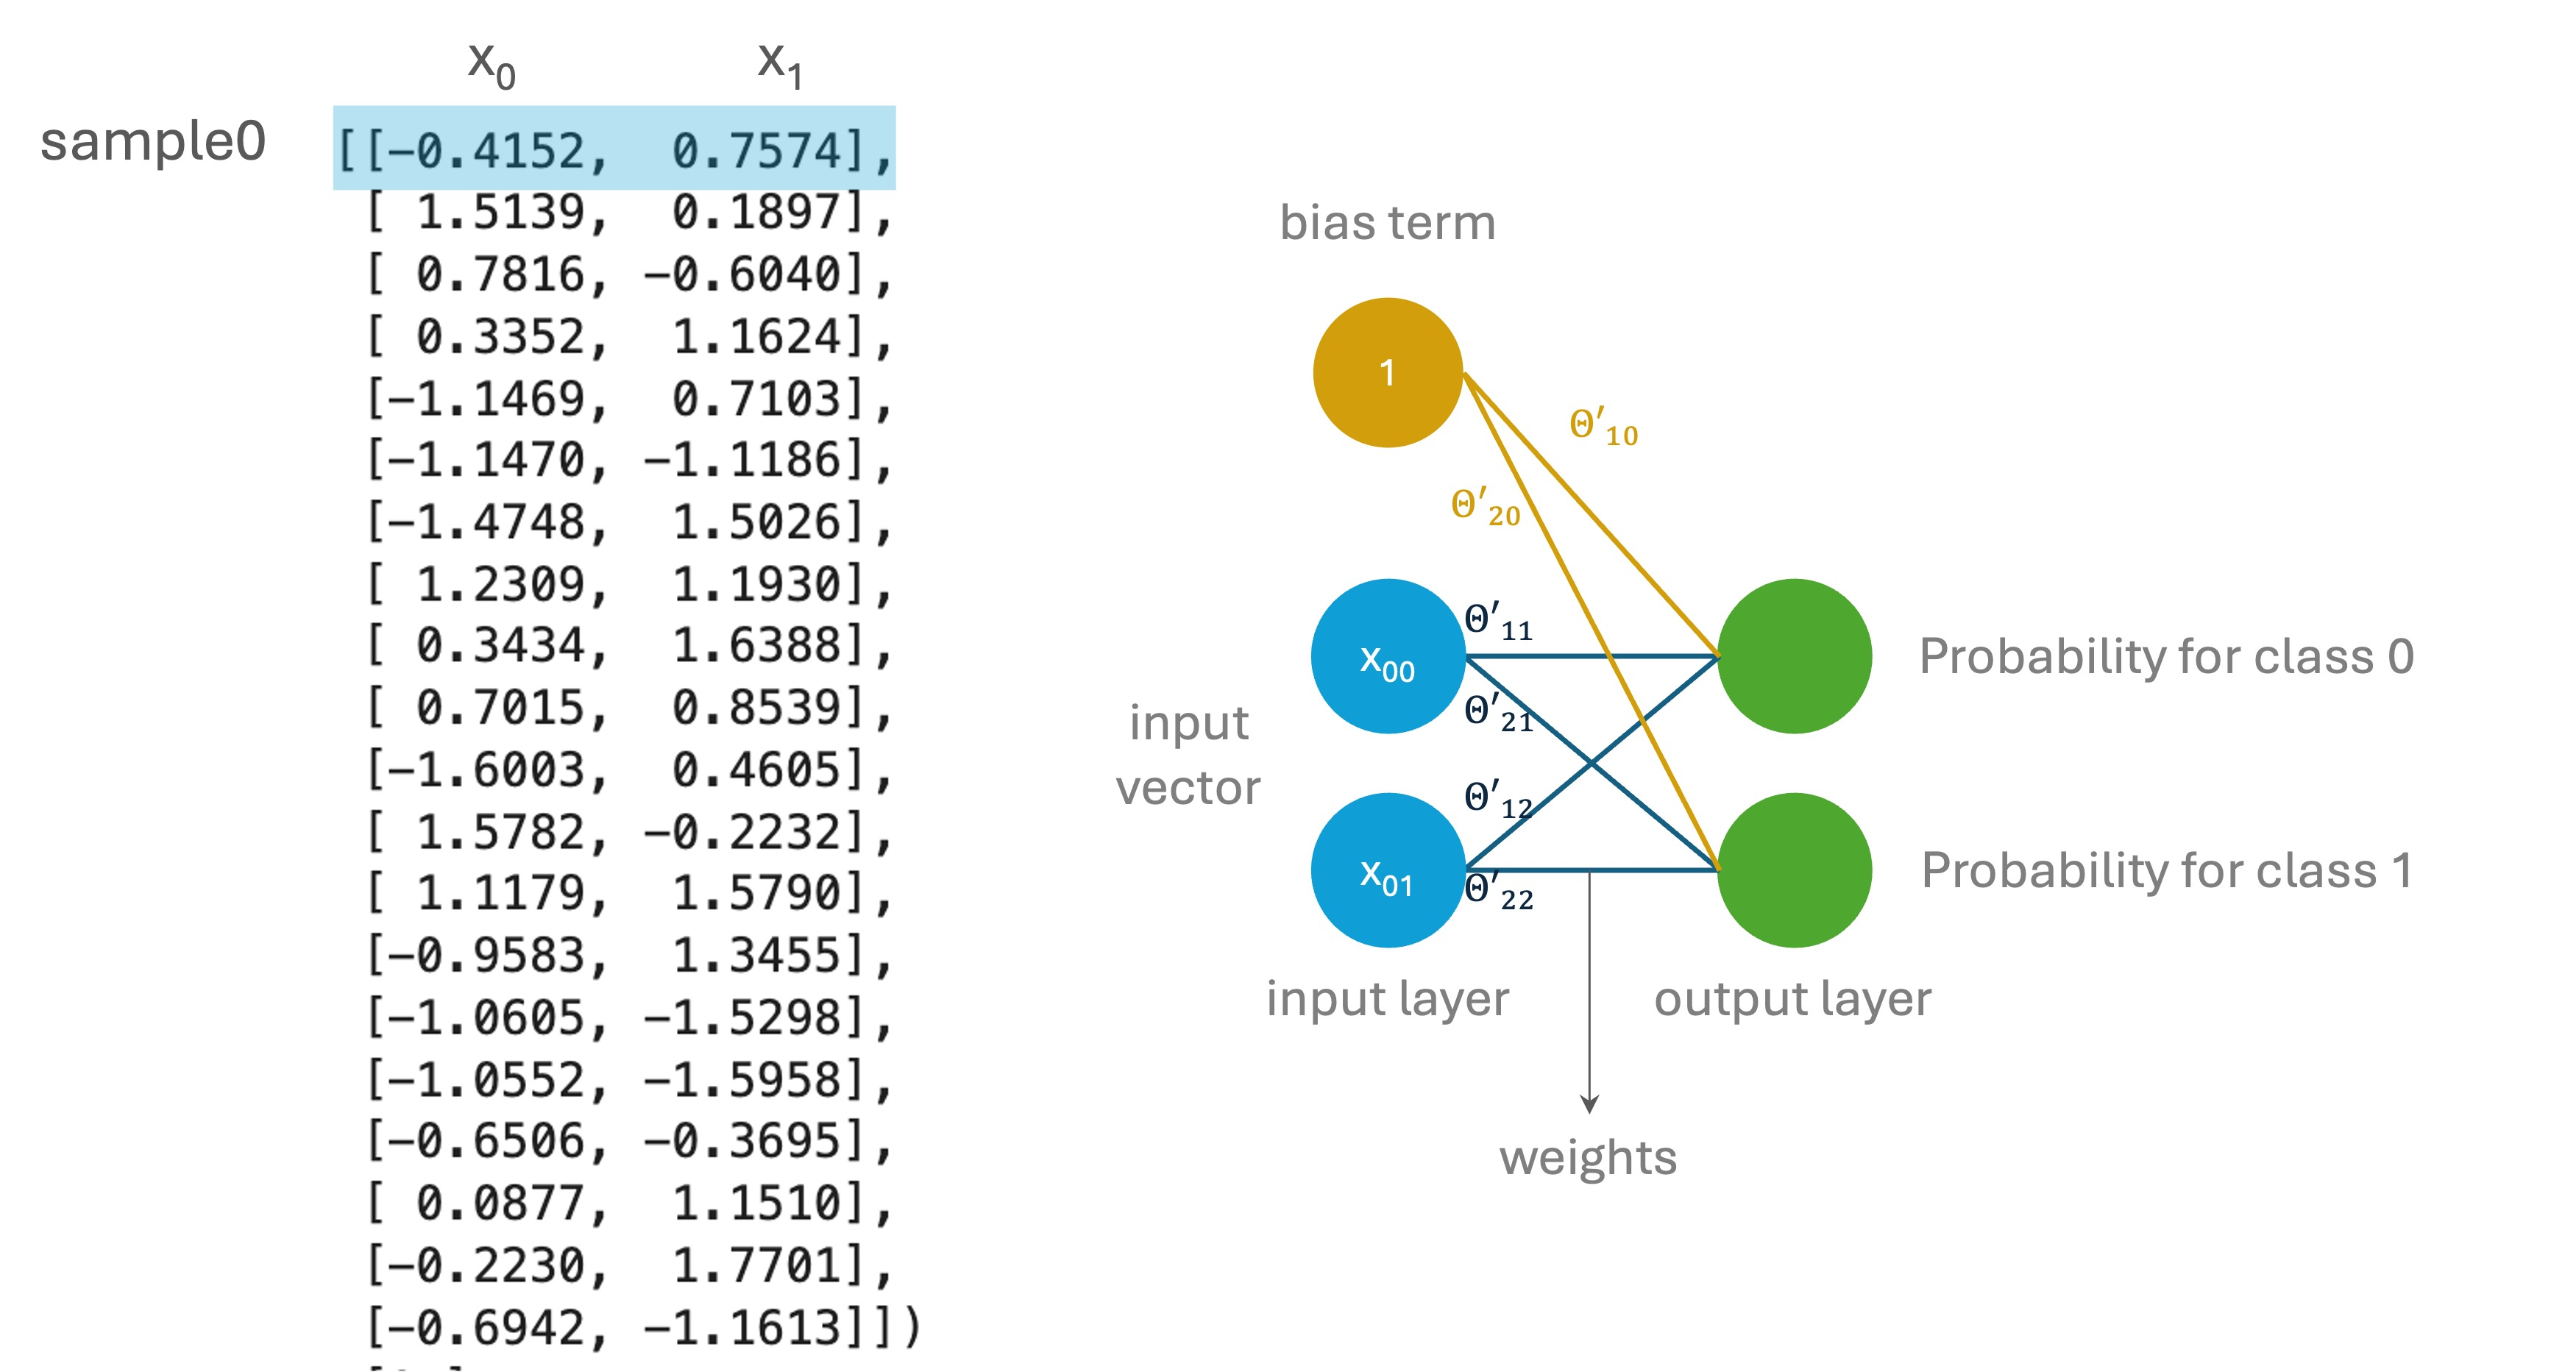

This is how the information is propagated in the network:

$$
\boldsymbol{z} = \boldsymbol{\Theta_0} + \boldsymbol{\Theta}\boldsymbol{x}.
$$.

Here $\boldsymbol{z}$ is a notation for the neurons' preactivation values (more on the concept of the activation later), which are called **logits**.


**Why do we need the bias?**

"The bias serves an important function:
- It shifts the activation function
- This allows the neuron to adjust its sensitivity to inputs
- A positive bias makes the neuron more likely to activate
- A negative bias makes it less likely to activate
"[(cit.)](https://github.com/DorsaRoh/Machine-Learning)

We now compute the logits $\boldsymbol{z}$:

In [5]:
#we can apply our linear model to inputs of specified channel size (2 in our case)
out_logits = linear_model(x)
out_logits.shape, out_logits

(torch.Size([20, 2]),
 tensor([[ 0.2977, -0.5661],
         [-2.2079,  1.2473],
         [-0.1362, -0.8446],
         [-1.3719,  1.0097],
         [ 1.5393, -1.6187],
         [ 3.5703, -4.1624],
         [ 1.1925, -0.9592],
         [-2.8619,  2.2608],
         [-1.9143,  1.6834],
         [-1.6248,  1.0749],
         [ 2.5538, -2.5780],
         [-1.8540,  0.7599],
         [-3.1069,  2.6453],
         [ 0.5274, -0.4809],
         [ 3.8864, -4.6176],
         [ 3.9511, -4.7023],
         [ 1.9316, -2.4509],
         [-0.9571,  0.6601],
         [-1.1393,  1.1017],
         [ 2.8817, -3.6109]], grad_fn=<AddmmBackward0>))

**TODO**: show that calling `linear_model(x)` provides the same logits as $\boldsymbol{z} = \boldsymbol{\Theta_0} + \boldsymbol{\Theta}\boldsymbol{x}$.

In [6]:
theta = linear_model.weight.data
theta0 = linear_model.bias.data

print(f"The weight matrix W_0 is: \n {theta}")
print(f"The bias vector b_0 is: \n {theta0}")

## TODO: Your code here
raise NotImplementedError()
out_logits_manual = ...

print(f"Manually calculated logits: \n {out_logits_manual}")
print(f"Logits  calculated with linear(x): \n {out_logits}")

The weight matrix W_0 is: 
 tensor([[-1.6256, -1.1104],
        [ 1.3492,  1.3908]])
The bias vector b_0 is: 
 tensor([ 0.4637, -1.0592])
Manually calculated logits: 
 tensor([[ 0.2977, -0.5661],
        [-2.2079,  1.2473],
        [-0.1362, -0.8446],
        [-1.3719,  1.0097],
        [ 1.5393, -1.6187],
        [ 3.5703, -4.1624],
        [ 1.1925, -0.9592],
        [-2.8619,  2.2608],
        [-1.9143,  1.6834],
        [-1.6248,  1.0749],
        [ 2.5538, -2.5780],
        [-1.8540,  0.7599],
        [-3.1069,  2.6453],
        [ 0.5274, -0.4809],
        [ 3.8864, -4.6176],
        [ 3.9511, -4.7023],
        [ 1.9316, -2.4509],
        [-0.9571,  0.6601],
        [-1.1393,  1.1017],
        [ 2.8817, -3.6109]])
Logits  calculated with linear(x): 
 tensor([[ 0.2977, -0.5661],
        [-2.2079,  1.2473],
        [-0.1362, -0.8446],
        [-1.3719,  1.0097],
        [ 1.5393, -1.6187],
        [ 3.5703, -4.1624],
        [ 1.1925, -0.9592],
        [-2.8619,  2.2608],
        [-

##### 1.3 Make predictions from a pretrained model.


We are ready to make the classification predictions. For this you should convert the logits into the probabilities using softmax:

$$
\text{softmax}(z_i) = \frac{\exp^{z_i}}{\sum_{j=1}^{n} \exp^{z_j}}.
$$

**Note**: you can also to make the classification prediction by using the logits scores $z_i$ directly, by selecting the class with the highest value. However, softmax provides additional benefits of converting logit values into class probabilities. This transformation procedure also allows you to measure the confidence of the model's prediction. For example, when class 0 has 95% probability vs class 1 5%, the classification label would be class 0. Similarly, when class 0 has 55% probability vs class 1 45%, the classification output is still class0, however the level of the confidence of the model is different.

In [7]:
#initializing the softmax function
softmax = nn.Softmax()

out_probs = softmax(out_logits)
print('shape of the output:\n', out_probs.shape)
print('outputted probabilities:\n', out_probs)

shape of the output:
 torch.Size([20, 2])
outputted probabilities:
 tensor([[7.0345e-01, 2.9655e-01],
        [3.0614e-02, 9.6939e-01],
        [6.7005e-01, 3.2995e-01],
        [8.4585e-02, 9.1541e-01],
        [9.5922e-01, 4.0777e-02],
        [9.9956e-01, 4.3807e-04],
        [8.9583e-01, 1.0417e-01],
        [5.9241e-03, 9.9408e-01],
        [2.6657e-02, 9.7334e-01],
        [6.2988e-02, 9.3701e-01],
        [9.9413e-01, 5.8712e-03],
        [6.8254e-02, 9.3175e-01],
        [3.1657e-03, 9.9683e-01],
        [7.3269e-01, 2.6731e-01],
        [9.9980e-01, 2.0262e-04],
        [9.9983e-01, 1.7450e-04],
        [9.8766e-01, 1.2340e-02],
        [1.6560e-01, 8.3440e-01],
        [9.6126e-02, 9.0387e-01],
        [9.9849e-01, 1.5123e-03]], grad_fn=<SoftmaxBackward0>)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


The predictions can be computed by choosing the class with the highest probability for each sample.

In [8]:
predictions = out_probs.argmax(axis=1)
print('outputted predictions:\n', predictions)
print('target:\n', y.to(torch.long))  #.to(torch.long) casts float 1.0 and 0.0 values to int type

outputted predictions:
 tensor([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])
target:
 tensor([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])


We see that the model correctly predicts the target output in 19 out of 20 cases.

##### 1.4 Build a model with nn.Sequential() and network class.


Let's combine the layers together. To run layers subsequently we can add them one by one into the nn.Sequential layer

In [9]:
# a model can consist of any number of layers

#nn.Sequential is a wrapper that allows to hold your consequent layers together
model = nn.Sequential(
    nn.Linear(in_features=number_of_input_channels, out_features=number_of_classes),
    nn.Softmax(dim=1))

#you can load weights of parts of the model
#but you have to make sure that the keys in dictionary model.state_dict() and
#in torch.load('lab1_layer_weights.pth') are matching

#also the sizes of tensors corresponding to each key should be the same
#otherwise you will get an error
model[0].load_state_dict(torch.load('lab1_layer_weights.pth'))

out_probs = model(x)
print('outputted probabilities:\n', out_probs)

predictions = out_probs.argmax(axis=1)
print('outputted predictions:\n', predictions)

print('target:\n', y.to(torch.long))
print('\n\n', 'model')
model

outputted probabilities:
 tensor([[7.0345e-01, 2.9655e-01],
        [3.0614e-02, 9.6939e-01],
        [6.7005e-01, 3.2995e-01],
        [8.4585e-02, 9.1541e-01],
        [9.5922e-01, 4.0777e-02],
        [9.9956e-01, 4.3807e-04],
        [8.9583e-01, 1.0417e-01],
        [5.9241e-03, 9.9408e-01],
        [2.6657e-02, 9.7334e-01],
        [6.2988e-02, 9.3701e-01],
        [9.9413e-01, 5.8712e-03],
        [6.8254e-02, 9.3175e-01],
        [3.1657e-03, 9.9683e-01],
        [7.3269e-01, 2.6731e-01],
        [9.9980e-01, 2.0262e-04],
        [9.9983e-01, 1.7450e-04],
        [9.8766e-01, 1.2340e-02],
        [1.6560e-01, 8.3440e-01],
        [9.6126e-02, 9.0387e-01],
        [9.9849e-01, 1.5123e-03]], grad_fn=<SoftmaxBackward0>)
outputted predictions:
 tensor([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])
target:
 tensor([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])


 model


<ipython-input-9-72e36d8e20eb>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model[0].load_state_dict(torch.load('lab1_layer_weights.pth'))


Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Softmax(dim=1)
)

To get more flexibility with network architecture, we can create a class defining a neural network. The class should have an **__init__** method with layers initialisation and **forward** method defining how those layers should be called. For automatic differentiation and compatibility with torch library, when writing a class of neural networks, it should inherit from a nn.Module class.

In [10]:
#class of neural network. Should have an intialisation and forward pass
class NN1Layer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.linear = nn.Linear(in_channels, out_channels)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        logits = self.linear(x)
        out = self.softmax(logits)
        return out

model = NN1Layer(number_of_input_channels, number_of_classes)
model.linear.load_state_dict(torch.load('lab1_layer_weights.pth'))

out_probs = model(x)
print('outputted probabilities:\n', out_probs)


predictions = out_probs.argmax(axis=1)
print('outputted predictions:\n', predictions)

print('target:\n', y.to(torch.long))
print('\n\n', 'model')
model

outputted probabilities:
 tensor([[7.0345e-01, 2.9655e-01],
        [3.0614e-02, 9.6939e-01],
        [6.7005e-01, 3.2995e-01],
        [8.4585e-02, 9.1541e-01],
        [9.5922e-01, 4.0777e-02],
        [9.9956e-01, 4.3807e-04],
        [8.9583e-01, 1.0417e-01],
        [5.9241e-03, 9.9408e-01],
        [2.6657e-02, 9.7334e-01],
        [6.2988e-02, 9.3701e-01],
        [9.9413e-01, 5.8712e-03],
        [6.8254e-02, 9.3175e-01],
        [3.1657e-03, 9.9683e-01],
        [7.3269e-01, 2.6731e-01],
        [9.9980e-01, 2.0262e-04],
        [9.9983e-01, 1.7450e-04],
        [9.8766e-01, 1.2340e-02],
        [1.6560e-01, 8.3440e-01],
        [9.6126e-02, 9.0387e-01],
        [9.9849e-01, 1.5123e-03]], grad_fn=<SoftmaxBackward0>)
outputted predictions:
 tensor([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])
target:
 tensor([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])


 model


<ipython-input-10-4d76d4e8de66>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.linear.load_state_dict(torch.load('lab1_layer_weights.pth'))


NN1Layer(
  (linear): Linear(in_features=2, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)

##### 1.5 Familiarize yourself with the idea of non-linearity, build the first NN with a non-linear activation function.


From linear algebra, we recall that the composition of linear functions, is a linear function. What this means, is that stacking layers with linear connections only in our network, its representation power will remain limited to a linear function. This is why people introduced **activation functions**. The role of an activation function is to introduce non-linearity to the networks and to increase the complexity of patterns that can be captured.

The activations of the neurons are computed as $\boldsymbol{h} = \text{a}(\boldsymbol{z})$, where $\text{a}$ is a non-linear function (more on the types of activation functions in the upcoming weeks).

We add the activation function to the model by adding a `nn.NAME_OF_ACTIVATION_FUNCTION()`, for example `nn.ReLU()`, after the `nn.Linear()` component.

**TODO** Your task now is to create a network that takes Di = 5 inputs, Do = 4 outputs and has three hidden layers of sizes D1 = 20, D2 = 10, and D3 = 7. The activation between linear layers should be a ReLU. Implement this network in Pytorch.

What are the sizes of each weight matrix and bias vectors?

In [11]:
#create a simple neural network with nn.Sequential


D_i = 5
D_o = 4

D_1 = 20 # dimensionality of the hidden layer 1
D_2 = 10 # dimensionality of the hidden layer 2
D_3 = 7 # dimensionality of the hidden layer 3
#TODO create a network
# model = ...
## TODO: Your code here
raise NotImplementedError()




##### 1.6 Count the model's parameters.
Output a summary of a model with torchsummary.

Calculate the number of parameters in the network and use the count_parameters() function to check your calculation.

We now use torchsummary to print the details about the model. We also write a function for counting the number of  parameters in the model.

In [12]:
# model summary
# you might need to install torchsummary with !pip install torchsummary

from torchsummary import summary
print('model summary')
summary(model, (10, 5)) # summary takes a model and an input data (or a shape of input data)

print('\n\n')
print('model parameters')
print( model.parameters() )
for parameter in model.parameters():
    print(parameter)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print('\n\n')
print('number of parameters: ', count_parameters(model))


model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 10, 20]             120
              ReLU-2               [-1, 10, 20]               0
            Linear-3               [-1, 10, 10]             210
              ReLU-4               [-1, 10, 10]               0
            Linear-5                [-1, 10, 7]              77
              ReLU-6                [-1, 10, 7]               0
            Linear-7                [-1, 10, 4]              32
Total params: 439
Trainable params: 439
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
----------------------------------------------------------------



model parameters
<generator object Module.parameters at 0x78a500a16500>
Parameter containing:
ten

In [13]:
#test your solution

assert count_parameters(model) == 439

model

Sequential(
  (0): Linear(in_features=5, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=7, bias=True)
  (5): ReLU()
  (6): Linear(in_features=7, out_features=4, bias=True)
)

##### (Optional) 1.7 Implement a class of (a skip-connection) network of a specified architecture.


**TODO:** Create a neural network class with three hidden layers and a skip connection. A skip connection allows activations from one layer to be directly used as an additional input for later layers. For example, take the activations from the first hidden layer and propagate them in two ways: as input to the second hidden layer (as usual) and as an additional input to the third hidden layer.

Linear connections should be a class variable `l{i}`, where `i` is the id of the layer: `l1` and `l2` should consist of a `nn.Sequential()` class containing `nn.Linear()`, and `nn.ReLU()`, `l3` should be a Linear layer only.

Additionaly the variable `softmax` should store the nn.Softmax() function.

The number of input channels, the number of output channels and the number of channels in the second dimension should be specified as initialisation parameters in_channels, out_channels, and hidden_channels correspondingly.

Define linear connections as class variables using the format l{i}, where i represents the layer index.

- `l1` and `l2` should be instances of `nn.Sequential()`, containing a `nn.Linear()` followed by a `nn.ReLU()`.
- `l3` should be a standalone `nn.Linear()`.

Additionally, store the `nn.Softmax()` function in the variable `softmax`.

The number of input channels, output channels, and hidden layer channels should be specified as initialization parameters: `in_channels`, `out_channels`, and `hidden_channels`, respectively.

In [14]:
#TODO: Create a model with 3 hidden layers and a skip connection between first and second hidden layer
# hidden dimension should be passed as a parameter to a neural network
# report the number of hidden parameters, disable the bias for the last layer

class NNSkip(nn.Module):
    def __init__(self, in_channels, out_channels, hidden_channels):
        super().__init__()
        #TODO: fill in the gaps for layer 1
        self.l1 = nn.Sequential(
              ## TODO: Your code here
              raise NotImplementedError()
            )
        #TODO: define layer 2 and 3

        ## TODO: Your code here
        raise NotImplementedError()
        #check that students don't add last activation function


        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = 0
        #TODO: implement the forward pass with a skip connection
        # return the output out

        ## TODO: Your code here
        raise NotImplementedError()


        return out

hidden_channels = 16
model = NNSkip(number_of_input_channels, 2, hidden_channels)
model.load_state_dict(torch.load('lab1_model_with_skip_connection_weights.pth'))
#if the model is constructed incorrectly you will get an error with weights loading


out_probs = model(x)
predictions = out_probs.argmax(axis=1)
print('outputted predictions:\n', predictions)

print('target:\n', y.to(torch.long))

assert np.all(predictions.numpy() == y.to(torch.long).numpy()) #this model was trained to output correct answer for all 20 test samples


print('\n\n', 'model')
model


outputted predictions:
 tensor([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])
target:
 tensor([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])


 model


<ipython-input-14-7ff28d884553>:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('lab1_model_with_skip_connection_weights.pth'))


NNSkip(
  (l1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
  )
  (l2): Sequential(
    (0): Linear(in_features=16, out_features=16, bias=True)
    (1): ReLU()
  )
  (l3): Sequential(
    (0): Linear(in_features=16, out_features=2, bias=False)
  )
  (softmax): Softmax(dim=1)
)